Question 1

The simple Linear Regression model aims to explain the relationship between the Predictor variable X and the Outcome variable Y. 
Predictor variable X: Also called the independent variable, this is the variable we use to predict the outcome.
Outcome variable Y: Also called the dependent variable, this is the variable we want to predict.

The relationship between X and Y can modeled by the equation: Y = β0 + β1X + ϵ

β0(Intercept): This is the point where the line intersects the Y-axis, representing the value of Y when X is zero.

β1(Slope): This coefficient represents the change in Y for a one-unit increase in X. It captures the strength and direction of the relationship between X and Y.

ϵ(Error Term): This term accounts for the randomness or noise in the data, representing factors that are not captured by X but still influence Y. It’s typically assumed to follow a normal distribution with a mean of zero and some variance σ2.

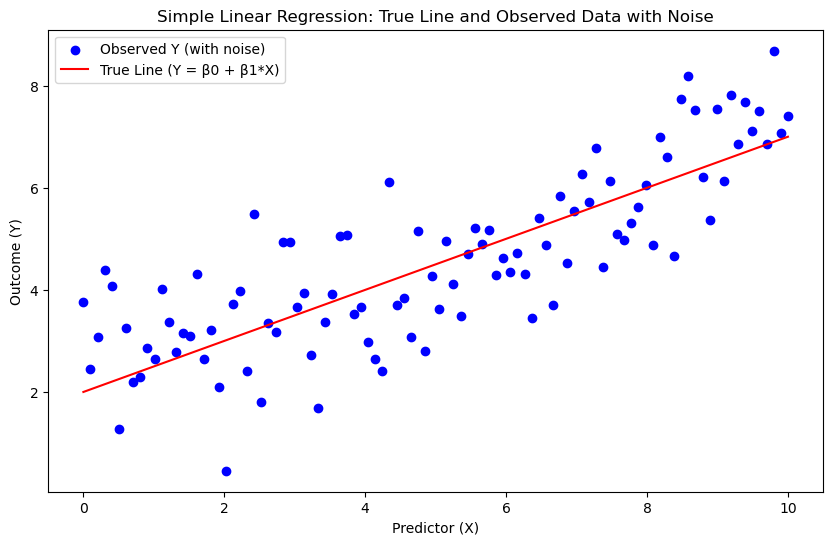

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0)

beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of the error term

X = np.linspace(0, 10, 100)

epsilon = norm.rvs(loc=0, scale=sigma, size=X.shape[0])

Y = beta_0 + beta_1 * X + epsilon

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Observed Y (with noise)")
plt.plot(X, beta_0 + beta_1 * X, color="red", label="True Line (Y = β0 + β1*X)")
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.title("Simple Linear Regression: True Line and Observed Data with Noise")
plt.legend()
plt.show("png")

Question 2

Step 1: Simulated the data

Step 2: Fit a simple linear regression model

Step 3: Visualize the fitted model

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           3.98e-24
Time:                        20:06:33   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2085      0.201     10.968      0.0

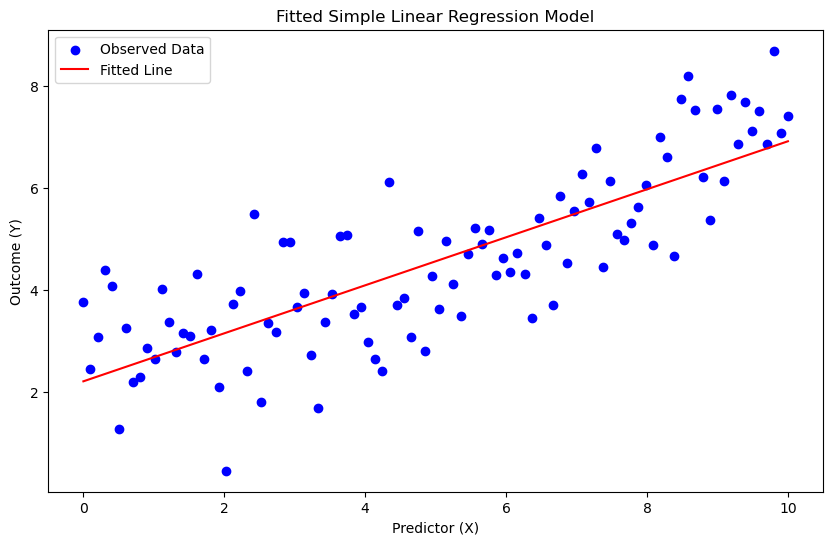

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import norm

np.random.seed(0)

beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of the error term

X = np.linspace(0, 10, 100)

epsilon = norm.rvs(loc=0, scale=sigma, size=X.shape[0])

Y = beta_0 + beta_1 * X + epsilon

data = pd.DataFrame({'X': X, 'Y': Y})

model = smf.ols(formula='Y ~ X', data=data).fit()

print(model.summary())

plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color="blue", label="Observed Data")
plt.plot(data['X'], model.fittedvalues, color="red", label="Fitted Line")
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.title("Fitted Simple Linear Regression Model")
plt.legend()
plt.show("png")

Question 3

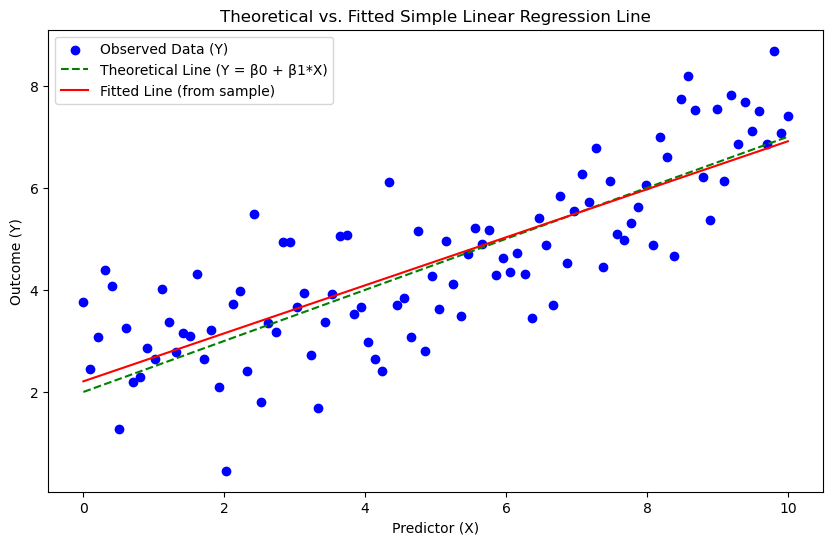

In [8]:
plt.figure(figsize=(10, 6))

plt.scatter(data['X'], data['Y'], color="blue", label="Observed Data (Y)")

plt.plot(data['X'], beta_0 + beta_1 * data['X'], color="green", linestyle="--", label="Theoretical Line (Y = β0 + β1*X)")

plt.plot(data['X'], model.fittedvalues, color="red", label="Fitted Line (from sample)")

plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.title("Theoretical vs. Fitted Simple Linear Regression Line")
plt.legend()
plt.show("png")

The two lines added are Theoretical Line and Fitted Line. 

Theoretical Line: This line represents the "true" relationship as specified by the model parameters 
β0=2.0 and β1=0.5. It does not account for any randomness or noise, showing the pure, idealized relationship between X and Y.

Fitted Line: This line results from fitting a model to the simulated dataset, which includes random noise. Since the data is a sample that introduces variability, the fitted slope and intercept may slightly differ from the theoretical values. Over many samples, the fitted line would average out to align closely with the theoretical line, but each sample introduces its unique variation.

Question 4

The fitted values in a linear regression model, accessible via fitted_model.fittedvalues, are derived using the estimated coefficients (parameters) of the model. These coefficients, specifically the intercept and slope, are stored in fitted_model.params. 

The fitted values represent the model’s predictions for Y based on the observed values of X and the estimated parameters (intercept and slope). They illustrate how the model line approximates the data points.

Question 5

The "ordinary least squares" (OLS) method picks the line that best fits the data by making the errors between observed and predicted points as small as possible. It does this by measuring how far each actual point is from the line, squaring these distances (so all errors are positive), and adding them up. The line chosen by OLS is the one that makes this total squared error as low as it can be, which helps ensure the line is as close as possible to all the points in the dataset.

Question 6

The first expression and fitted_model.rsquared both measure the proportion of Y's variability that the model explains, with higher values indicating a more accurate model.
The squared correlation values capture the same concept in a simpler way, as they quantify the strength of the linear relationship between Y and the fitted values (or predictor X).
Together, these metrics let us gauge the model’s explanatory power and the effectiveness of X in predicting Y.

Question 7

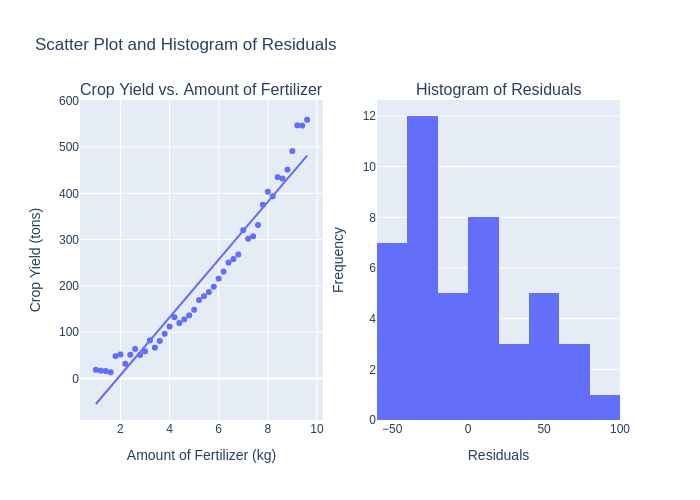

In [9]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show("png")

1.Linearity

Observation: The data in the scatter plot shows a non-linear relationship between fertilizer amount and crop yield, where crop yield initially grows slowly, then more rapidly, and then possibly plateaus or increases non-linearly.

Implication: The Simple Linear Regression model assumes a straight-line relationship between the predictor (fertilizer amount) and the outcome (crop yield). This assumption appears to be violated because the growth pattern suggests a curve, indicating a non-linear trend in the data.

2.Homoscedasticity:

Observation: From the histogram of residuals, the spread of residuals may increase as fertilizer amounts get higher, implying that variance in crop yield isn’t constant.

Implication: The Simple Linear Regression model assumes that the residuals (errors) have constant variance across all levels of the predictor. However, in this data, the variance appears to increase with larger values of fertilizer, violating the homoscedasticity assumption. This increasing variance can lead to inefficiency in the model’s estimates.

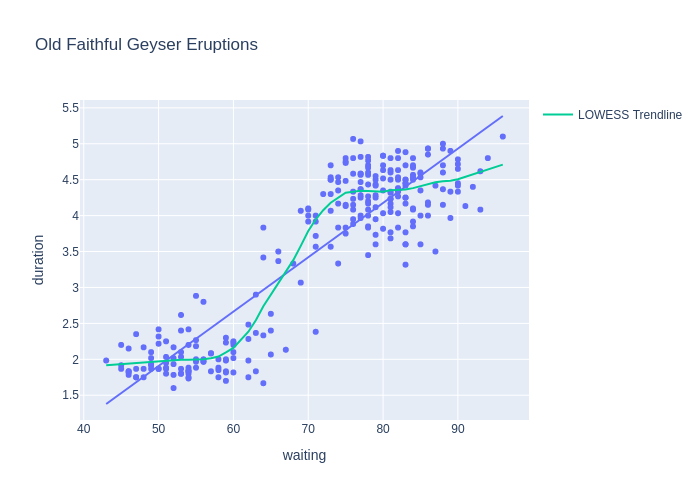

In [10]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show("png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 8

In [1]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        01:54:00   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In Simple Linear Regression, a null hypothesis of "no linear association (on average)" between the predictor and outcome variables can be specified as follows:

Null Hypothesis (H0): The slope parameter (β1) is equal to zero. This means there is no average linear relationship between the predictor and outcome variable. H0:β1 = 0

Alternative Hypothesis (H1): The slope parameter (β1) is not equal to zero, indicating an average linear association. H0:β1 ≠ 0

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        02:02:32   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

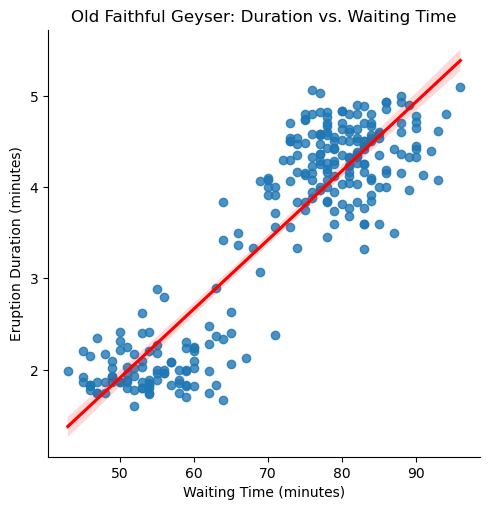

In [3]:
#code provide by chatbot
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Old Faithful Geyser dataset from seaborn
geyser_data = sns.load_dataset("geyser")

# Perform linear regression on the dataset
# Assuming "waiting" time predicts "duration" of eruptions
model = smf.ols("duration ~ waiting", data=geyser_data).fit()

# Display summary of the model, which includes the p-value for the slope
print(model.summary())

# Visualize the data and the regression line
sns.lmplot(x="waiting", y="duration", data=geyser_data, line_kws={'color': 'red'})
plt.title("Old Faithful Geyser: Duration vs. Waiting Time")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Eruption Duration (minutes)")
plt.show("png")

Interpretation of Results

1.p-value for the Slope: In the model summary, check the p-value associated with the slope. If this p-value is below a significance threshold, we have evidence to reject the null hypothesis and conclude that there is a statistically significant linear association between waiting time and eruption duration in the Old Faithful Geyser dataset.

2.Interpretation of Findings:

    If p<0.05: This would suggest that waiting time has a meaningful linear relationship with eruption duration, so knowing the waiting time helps predict the duration of eruptions. Thus, we would believe there is likely a positive association between these variables.
    
    If p≥0.05: Failing to reject the null hypothesis would indicate insufficient evidence to conclude a linear association, suggesting that waiting time may not be a useful predictor of eruption duration based on this model.

Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


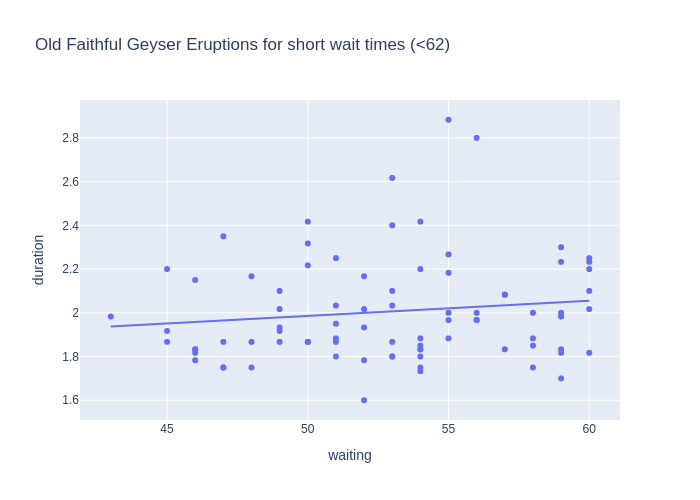

In [4]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show("png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.Significant Relationship (p-value < 0.05):
    
    If the p-value for the slope is less than 0.05, it indicates a significant linear association between waiting time and eruption duration within the restricted short wait times.
    
    This would suggest that even for shorter wait times, there is a measurable linear relationship between these variables.
    
2.No Significant Relationship (p-value ≥ 0.05):
    
    If the p-value is 0.05 or higher, there is insufficient evidence to reject the null hypothesis of no linear relationship.
    
    This result would imply that, within the context of shorter wait times, wait time may not be a reliable predictor of eruption duration as it was in the full dataset, where the longer wait times influenced the positive relationship.

Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


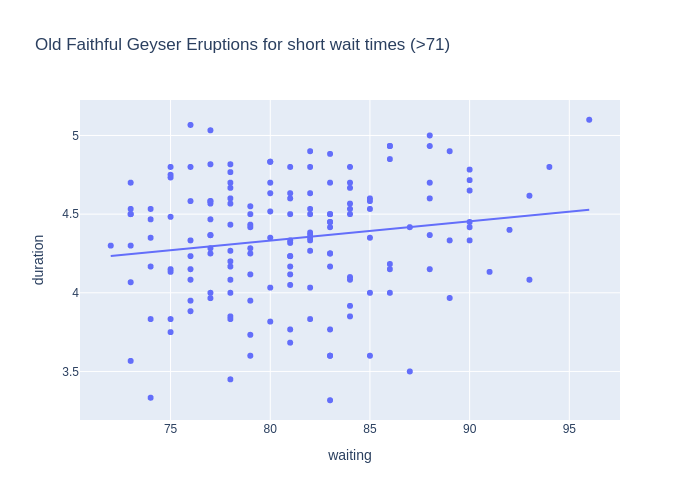

In [6]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show("png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

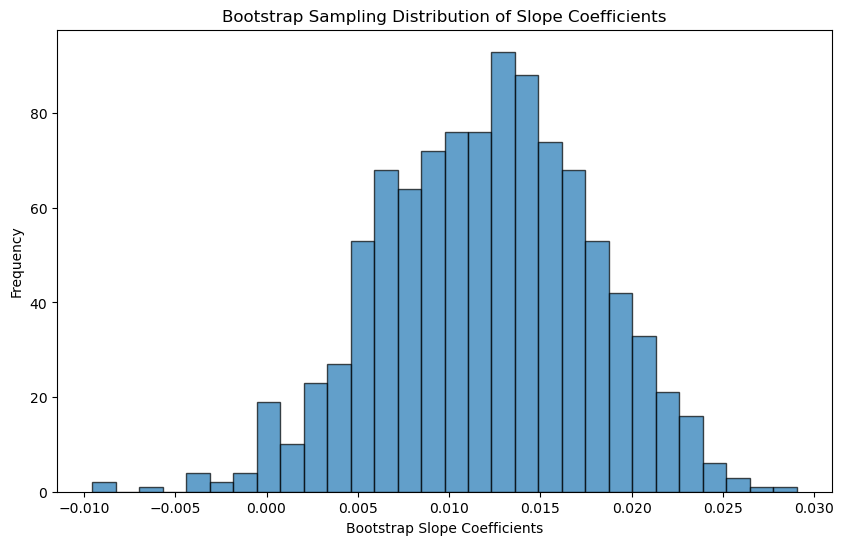

95% Bootstrapped Confidence Interval for Slope: [0.00029578 0.02279356]


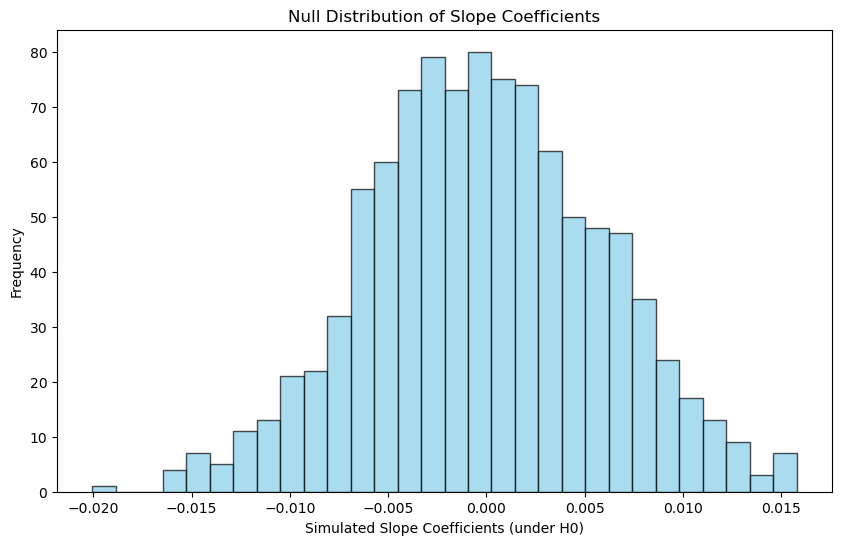

Does the 95% confidence interval contain 0? False
Simulated p-value: 0.041

Actual Data Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


In [15]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

geyser_data = sns.load_dataset("geyser")
long_wait_limit = 71
long_wait_data = geyser_data[geyser_data['waiting'] > long_wait_limit]

# 1. Bootstrap Sampling for Slope Coefficients
n_bootstrap = 1000
bootstrap_slopes = []

for _ in range(n_bootstrap):
    sample = long_wait_data.sample(n=len(long_wait_data), replace=True)
    model = smf.ols("duration ~ waiting", data=sample).fit()
    bootstrap_slopes.append(model.params['waiting'])

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_slopes, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Bootstrap Slope Coefficients")
plt.ylabel("Frequency")
plt.title("Bootstrap Sampling Distribution of Slope Coefficients")
plt.show("png")

ci_bootstrap = np.percentile(bootstrap_slopes, [2.5, 97.5])
print("95% Bootstrapped Confidence Interval for Slope:", ci_bootstrap)

# 2. Simulation under Null Hypothesis (β1 = 0)
np.random.seed(0)
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
n_sim = 160
simulated_slopes = []

for _ in range(n_bootstrap):
    x_sim = long_wait_data['waiting'].values
    y_sim = beta_0 + beta_1 * x_sim + np.random.normal(0, sigma, n_sim)
    sim_data = pd.DataFrame({'waiting': x_sim, 'duration': y_sim})
    sim_model = smf.ols("duration ~ waiting", data=sim_data).fit()
    simulated_slopes.append(sim_model.params['waiting'])

plt.figure(figsize=(10, 6))
plt.hist(simulated_slopes, bins=30, edgecolor='k', alpha=0.7, color='skyblue')
plt.xlabel("Simulated Slope Coefficients (under H0)")
plt.ylabel("Frequency")
plt.title("Null Distribution of Slope Coefficients")
plt.show("png")

# 3. Reporting results
contains_zero = (ci_bootstrap[0] <= 0 <= ci_bootstrap[1])
print("Does the 95% confidence interval contain 0?", contains_zero)

observed_slope = smf.ols("duration ~ waiting", data=long_wait_data).fit().params['waiting']
p_value_simulated = (np.sum(np.abs(simulated_slopes) >= np.abs(observed_slope)) / len(simulated_slopes))
print("Simulated p-value:", p_value_simulated)

actual_model_summary = smf.ols("duration ~ waiting", data=long_wait_data).fit().summary().tables[1]
print("\nActual Data Model Summary:\n", actual_model_summary)

Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


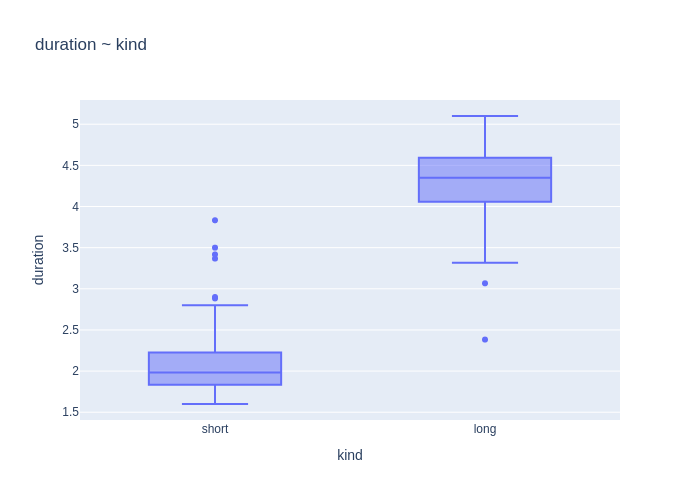

In [11]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show("png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.Indicator Variable Model:

    kind is set to "short" for wait times below 68 minutes and "long" otherwise.
    
    The model compares average durations between the long and short groups.

2.Comparison to Previous Models:

    Previous Models: Directly used waiting as a continuous predictor to model a linear relationship with duration.
    
    Current Model: Uses an indicator variable (kind) to test if there’s an average difference in duration between the two groups (without assuming a linear relationship).

3.Evidence Against Null Hypothesis:

    The model summary will show if the coefficient for kind is significantly different from zero.
    
    A significant result would indicate a difference in duration between long and short groups, providing evidence against the null hypothesis of "no difference in duration between groups."

                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.3000      0.199     11.558      0.000       1.870       2.730
C(kind, Treatment(reference="short"))[T.long]     1.4111      0.257      5.493      0.000       0.856       1.966


/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



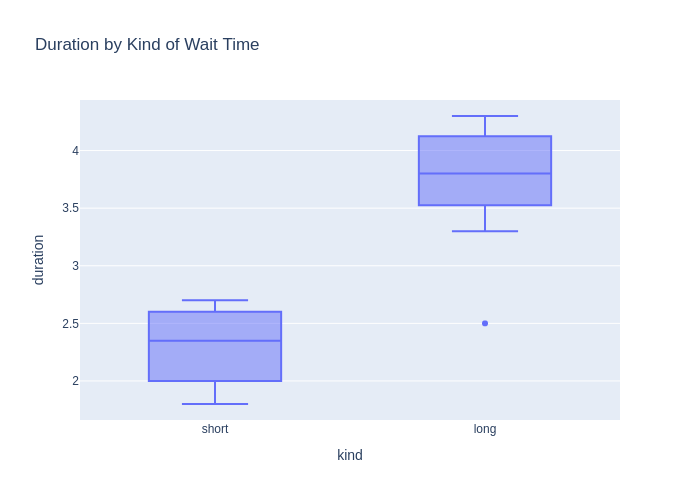

In [13]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

old_faithful = pd.DataFrame({
    'waiting': [72, 60, 75, 55, 79, 67, 81, 64, 70, 69, 73, 66, 78, 62, 80],
    'duration': [3.6, 1.8, 3.3, 2.0, 4.0, 2.3, 4.3, 2.4, 3.6, 2.5, 3.8, 2.6, 4.1, 2.7, 4.2]
})

old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'long' if x >= 68 else 'short')

model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

print(model.summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration by Kind of Wait Time',
             category_orders={'kind': ['short', 'long']})
fig.show("png")


Question 12

/tmp/ipykernel_53/4094737088.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_53/4094737088.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



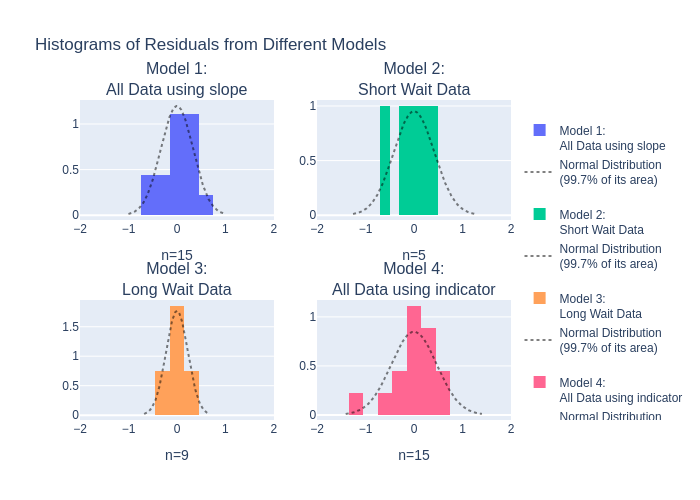

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show("png")

The assumption for a Simple Linear Regression model is that the error terms (residuals) are normally distributed. A visual inspection of residuals via histograms and overlaying the normal distribution can help determine if this assumption holds:

1.Visual Cues for Normality:

    Symmetry around zero.
    
    Bell shape resembling a normal distribution curve.
    
    Limited skewness and no heavy tails.

2.Comparison of Histograms:

    Model 1 (All Data using Slope): Look for a histogram close to the bell curve, particularly if residuals are symmetrically distributed around zero.
    
    Model 2 (Short Wait Data): Smaller sample sizes might show more variability, but if the distribution is fairly symmetric, it could support normality.
    
    Model 3 (Long Wait Data): Larger samples improve the ability to assess normality. Skewness or a non-bell shape might suggest deviations from normality.
    
    Model 4 (All Data using Indicator): The presence of an indicator variable might introduce non-normal patterns if there are differences in groups.

Question 13

A: Permutation Test

Objective: 
    
    The goal is to test the null hypothesis, H0 : μshort = μlong, which states that there is no difference in the mean duration between short and long wait groups.

Method:
    
    Pool the "short" and "long" samples together.
    
    Shuffle the labels to create new random groupings without actually changing the pooled data.
    
    Calculate the difference in means between the new "short" and "long" groups.
    
    Repeat the shuffling process many times to create a distribution of mean differences under the null hypothesis.

Interpretation:
    
    The p-value is the proportion of shuffled mean differences that are as extreme or more extreme than the observed difference in the original data.
    
    If this p-value is low, we reject the null hypothesis, indicating a significant difference between the groups.

B: Bootstrap Confidence Interval

Objective: 
    
    To construct a 95% confidence interval for the difference in means between the two groups.

Method:

    For each group, draw random samples (with replacement) of the same size as the original group.
    
    Calculate the mean of each bootstrap sample for both groups and then compute the difference between these means.
    
    Repeat this bootstrapping process many times to get a distribution of mean differences.
    
    Calculate the 2.5th and 97.5th percentiles of the bootstrap distribution to form a 95% confidence interval for the mean difference.

Interpretation:
    
    If the 95% confidence interval does not contain zero, this suggests a statistically significant difference in means.

a. 

Permutation Test: This method tests the hypothesis by examining all possible ways to assign "short" and "long" labels, creating a distribution of mean differences under the assumption of no effect. This method is non-parametric and does not rely on assumptions about the underlying distribution of data.

Bootstrap Confidence Interval: This method estimates the variability in sample statistics (mean difference) by repeatedly resampling from the data itself. It assumes that the original data are representative and uses their distribution to estimate confidence intervals.

b. 

Similarity:
    
    Both the permutation test and the indicator variable approach test for differences between "short" and "long" groups.
    
    The bootstrap confidence interval and the indicator model’s confidence interval both provide a range of plausible values for the mean difference.

Difference:
    
    The indicator variable model assumes linear relationships and relies on model-based assumptions, whereas the permutation test and bootstrap do not.
    
    The permutation test is purely based on label shuffling and does not rely on model structure.
    
    The indicator variable model directly incorporates group differences as a fixed effect, whereas the permutation and bootstrap approaches do not rely on regression.

Question 14

Yes